In [ ]:
!pip install matplotlib fpdf
!pip install deepface scipy numpy opencv-python

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=4924c5c7c5845ded298a775f64d67b744922b94e21a6189b3a8e85e6a2502683
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=57064a6ccbc8ed4de9774bf58a9f7163969537ba2e7f2e24138dc7bb35d2405d
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b60

In [ ]:
# Install Git LFS (required for large file downloads)
!git lfs install

# Clone the dataset repository from Hugging Face
!git clone https://huggingface.co/datasets/cledoux42/autotrain-data-ethnicity-test_v003

# Import required libraries
import shutil
from google.colab import files

# Define source directory and output ZIP file path
source_dir = "/content/autotrain-data-ethnicity-test_v003/raw/image_folders/auto/ethnicty-classify"
zip_file = "/content/ethnicity_dataset.zip"

# Zip the entire ethnicity-classify folder
shutil.make_archive(zip_file.replace('.zip', ''), 'zip', source_dir)

# Download the ZIP file
files.download(zip_file)

# !unzip ethnicity_dataset.zip -d dataset

Git LFS initialized.
Cloning into 'autotrain-data-ethnicity-test_v003'...
remote: Enumerating objects: 6085, done.
remote: Total 6085 (delta 0), reused 0 (delta 0), pack-reused 6085 (from 1)
Receiving objects: 100% (6085/6085), 829.33 KiB | 3.29 MiB/s, done.
Resolving deltas: 100% (58/58), done.
Updating files: 100% (5677/5677), done.
Filtering content: 100% (5670/5670), 2.06 GiB | 18.40 MiB/s, done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!unzip ethnicity_dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/indian/00766.jpg  
  inflating: dataset/indian/00528.jpg  
  inflating: dataset/indian/00471.jpg  
  inflating: dataset/indian/00731.jpg  
  inflating: dataset/indian/00374.jpg  
  inflating: dataset/indian/00251.jpg  
  inflating: dataset/indian/00670.jpg  
  inflating: dataset/indian/00179.jpg  
  inflating: dataset/indian/00595.jpg  
  inflating: dataset/indian/00034.jpg  
  inflating: dataset/indian/00563.jpg  
  inflating: dataset/indian/00777.jpg  
  inflating: dataset/indian/00115.jpg  
  inflating: dataset/indian/00147.jpg  
  inflating: dataset/indian/00589.jpg  
  inflating: dataset/indian/00774.jpg  
  inflating: dataset/indian/00303.jpg  
  inflating: dataset/indian/00970.jpg  
  inflating: dataset/indian/01100.jpg  
  inflating: dataset/indian/00383.jpg  
  inflating: dataset/indian/00661.jpg  
  inflating: dataset/indian/00011.jpg  
  inflating: dataset/indian/00436.jpg  
  inflating: dataset/indian/0

25-04-26 05:11:01 - Directory /root/.deepface has been created
25-04-26 05:11:01 - Directory /root/.deepface/weights has been created
25-04-26 05:11:04 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:09<00:00, 58.1MB/s]


[SKIP] predicted 'middle eastern' for dataset/african/00073.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/00075.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/01111.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/00232.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/00212.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/01022.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/00057.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/00177.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/00124.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/00739.jpg not in label set → counted as FN
[SKIP] predicted 'middle easte

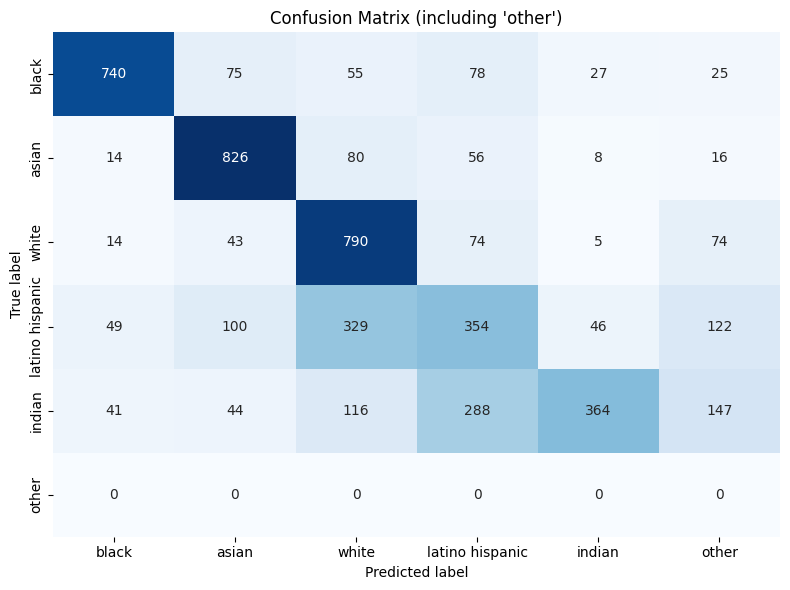

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
from sklearn.metrics import confusion_matrix
import seaborn as sns

# --- Configuration ---
DATASET_PATH = "dataset"  # subfolders: 'african', 'asian', etc.
IMG_SIZE = (160, 160)

# Map your folder names → DeepFace keys
ETHNICITY_MAP = {
    "african": "black",
    "asian": "asian",
    "caucasian": "white",
    "hispanic": "latino hispanic",
    "indian": "indian"
}
# The “valid” labels we want to evaluate
ETHNICITY_LABELS = ['black', 'asian', 'white', 'latino hispanic', 'indian']
# A catch‑all for any prediction outside our set or detection failures
OTHER_LABEL = 'other'
FULL_LABELS = ETHNICITY_LABELS + [OTHER_LABEL]

# --- Helpers ---
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None
    return cv2.resize(img, IMG_SIZE)

def predict_ethnicity(img):
    try:
        out = DeepFace.analyze(img_path=img, actions=['race'], enforce_detection=False)
        return out[0]['race']
    except Exception as e:
        print(f"[ERROR] DeepFace.analyze failed: {e}")
        return None

# --- Collect preds & ground truths, forcing every image into the tally ---
ethnicity_predictions = []
ground_truth = []

for folder in ETHNICITY_MAP:
    path = os.path.join(DATASET_PATH, folder)
    if not os.path.isdir(path):
        continue

    imgs = os.listdir(path)[:1000]
    for fn in imgs:
        img_path = os.path.join(path, fn)
        img = preprocess_image(img_path)
        if img is None:
            print(f"[SKIP] could not read file {img_path} → counted as FN")
            ethnicity_predictions.append(OTHER_LABEL)
            ground_truth.append(ETHNICITY_MAP[folder])
            continue

        preds = predict_ethnicity(img)
        if not preds:
            print(f"[SKIP] no DeepFace result for {img_path} → counted as FN")
            ethnicity_predictions.append(OTHER_LABEL)
            ground_truth.append(ETHNICITY_MAP[folder])
            continue

        top = max(preds, key=preds.get)
        if top not in ETHNICITY_LABELS:
            print(f"[SKIP] predicted '{top}' for {img_path} not in label set → counted as FN")
            ethnicity_predictions.append(OTHER_LABEL)
        else:
            ethnicity_predictions.append(top)
        ground_truth.append(ETHNICITY_MAP[folder])

# --- Build confusion matrix over FULL_LABELS so no image is dropped ---
cm = confusion_matrix(ground_truth, ethnicity_predictions, labels=FULL_LABELS)

# --- Metrics on our five target classes only ---
def calculate_metrics(cm, labels):
    total = cm.sum()
    m = {}
    for i, lbl in enumerate(labels):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = total - (TP + FP + FN)

        FPR = FP / (FP + TN) if (FP + TN) else 0
        FNR = FN / (FN + TP) if (FN + TP) else 0
        TE  = FNR / FPR if FPR else float('inf')

        m[lbl] = dict(TP=TP, FP=FP, FN=FN, TN=TN, FPR=FPR, FNR=FNR, Treatment_Equality=TE)
    return m

metrics = calculate_metrics(cm, ETHNICITY_LABELS)

print("\n📊 Performance Metrics and Treatment Equality:\n")
for lbl, v in metrics.items():
    print(f"{lbl.capitalize():<16} TP={v['TP']:2d}  FP={v['FP']:2d}  FN={v['FN']:2d}  TN={v['TN']:2d}  "
          f"FPR={v['FPR']:.4f}  FNR={v['FNR']:.4f}  TE={v['Treatment_Equality']:.4f}")

# --- Plot confusion matrix including ‘other’ row/col ---
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=FULL_LABELS, yticklabels=FULL_LABELS,
            cmap='Blues', cbar=False)
plt.title("Confusion Matrix (including 'other')")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

In [ ]:
# --- Additional Fairness Metrics ---

def compute_fairness_metrics(cm, labels):
    metrics = {}
    total_samples = cm.sum()
    label_indices = {lbl: i for i, lbl in enumerate(labels)}

    for lbl in labels:
        i = label_indices[lbl]

        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = total_samples - TP - FP - FN

        # Demographic Parity: P(pred = positive | group)
        pred_pos = cm[:, i].sum()
        dp = pred_pos / total_samples if total_samples else 0

        # Equality of Opportunity: TP / (TP + FN)
        eo = TP / (TP + FN) if (TP + FN) else 0

        # Equalized Odds: both TPR and FPR should be equal across groups
        tpr = TP / (TP + FN) if (TP + FN) else 0
        fpr = FP / (FP + TN) if (FP + TN) else 0

        # Predictive Parity: TP / (TP + FP)
        ppv = TP / (TP + FP) if (TP + FP) else 0

        # Treatment Equality: FNR / FPR (already calculated)
        TE = fpr if fpr else float('inf')
        TE_ratio = (FN / (FN + TP)) / fpr if fpr else float('inf')

        metrics[lbl] = {
            'Demographic_Parity': dp,
            'Equality_of_Opportunity': eo,
            'Equalized_Odds_TPR': tpr,
            'Equalized_Odds_FPR': fpr,
            'Predictive_Parity': ppv,
            'Treatment_Equality': TE_ratio
        }

    return metrics

fairness_metrics = compute_fairness_metrics(cm, ETHNICITY_LABELS)

print("\n📊 Fairness Metrics per Class:\n")
for lbl, v in fairness_metrics.items():
    print(f"{lbl.capitalize():<16}  "
          f"DP={v['Demographic_Parity']:.4f}  "
          f"EOpp={v['Equality_of_Opportunity']:.4f}  "
          f"EOdds_TPR={v['Equalized_Odds_TPR']:.4f}  "
          f"EOdds_FPR={v['Equalized_Odds_FPR']:.4f}  "
          f"PPV={v['Predictive_Parity']:.4f}  "
          f"TE={v['Treatment_Equality']:.4f}")



📊 Fairness Metrics per Class:

Black             DP=0.1716  EOpp=0.7400  EOdds_TPR=0.7400  EOdds_FPR=0.0295  PPV=0.8625  TE=8.8136
Asian             DP=0.2176  EOpp=0.8260  EOdds_TPR=0.8260  EOdds_FPR=0.0655  PPV=0.7592  TE=2.6565
White             DP=0.2740  EOpp=0.7900  EOdds_TPR=0.7900  EOdds_FPR=0.1450  PPV=0.5766  TE=1.4483
Latino hispanic   DP=0.1700  EOpp=0.3540  EOdds_TPR=0.3540  EOdds_FPR=0.1240  PPV=0.4165  TE=5.2097
Indian            DP=0.0900  EOpp=0.3640  EOdds_TPR=0.3640  EOdds_FPR=0.0215  PPV=0.8089  TE=29.5814


In [ ]:
!unzip Test.zip -d datase

Archive:  Test.zip
   creating: datase/Test/
   creating: datase/Test/Female/
  inflating: datase/Test/Female/image1.jpg  
  inflating: datase/Test/Female/image10.jpg  
  inflating: datase/Test/Female/image1000.jpg  
  inflating: datase/Test/Female/image101.jpg  
  inflating: datase/Test/Female/image11.jpg  
  inflating: datase/Test/Female/image15.jpg  
  inflating: datase/Test/Female/image16.jpg  
  inflating: datase/Test/Female/image165.jpg  
  inflating: datase/Test/Female/image17.jpg  
  inflating: datase/Test/Female/image18.jpg  
  inflating: datase/Test/Female/image19.jpg  
  inflating: datase/Test/Female/image22.jpg  
  inflating: datase/Test/Female/image24.jpg  
  inflating: datase/Test/Female/image25.jpg  
  inflating: datase/Test/Female/image28.jpg  
  inflating: datase/Test/Female/image30.jpg  
  inflating: datase/Test/Female/image31.jpg  
  inflating: datase/Test/Female/image32.jpg  
  inflating: datase/Test/Female/image33.jpg  
  inflating: datase/Test/Female/image35.jpg  

[DEBUG] DeepFace output: [{'gender': {'Woman': np.float32(0.17843941), 'Man': np.float32(99.82156)}, 'dominant_gender': 'Man', 'region': {'x': 36, 'y': 48, 'w': 91, 'h': 91, 'left_eye': None, 'right_eye': None}, 'face_confidence': np.float64(0.9)}]
[DEBUG] DeepFace output: [{'gender': {'Woman': np.float32(2.3763916), 'Man': np.float32(97.623604)}, 'dominant_gender': 'Man', 'region': {'x': 43, 'y': 55, 'w': 71, 'h': 71, 'left_eye': None, 'right_eye': None}, 'face_confidence': np.float64(0.93)}]
[DEBUG] DeepFace output: [{'gender': {'Woman': np.float32(4.601037), 'Man': np.float32(95.398964)}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 159, 'h': 159, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0}]
[DEBUG] DeepFace output: [{'gender': {'Woman': np.float32(0.015422833), 'Man': np.float32(99.98457)}, 'dominant_gender': 'Man', 'region': {'x': 34, 'y': 50, 'w': 91, 'h': 91, 'left_eye': None, 'right_eye': None}, 'face_confidence': np.float64(0.92)}]
[DEBUG] DeepFace

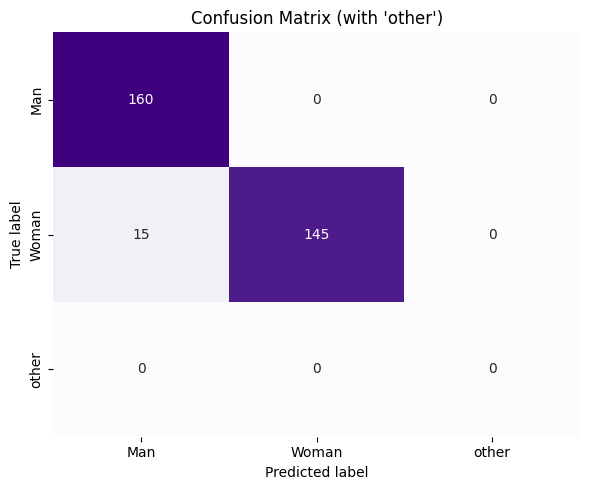


📊 Fairness Metrics per Gender:

Man         DP=0.5469  EOpp=1.0000  EOdds_TPR=1.0000  EOdds_FPR=0.0938  PPV=0.9143  TE=0.0000
Woman       DP=0.4531  EOpp=0.9062  EOdds_TPR=0.9062  EOdds_FPR=0.0000  PPV=1.0000  TE=inf


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
from sklearn.metrics import confusion_matrix
import seaborn as sns

# --- Configuration ---
DATASET_PATH = "datase/Test"  # subfolders: 'male', 'female'
IMG_SIZE = (160, 160)

# Folder name to label mapping
GENDER_MAP = {
    "male": "Man",
    "female": "Woman"
}

GENDER_LABELS = ['Man', 'Woman']
OTHER_LABEL = 'other'
FULL_LABELS = GENDER_LABELS + [OTHER_LABEL]

# --- Helpers ---
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None
    return cv2.resize(img, IMG_SIZE)

def predict_gender(img):
    try:
        out = DeepFace.analyze(img_path=img, actions=['gender'], enforce_detection=False)
        print("[DEBUG] DeepFace output:", out)
        return out[0]  # Contains 'gender', 'dominant_gender', etc.
    except Exception as e:
        print(f"[ERROR] DeepFace.analyze failed: {e}")
        return None

# --- Predictions & Labels ---
gender_predictions = []
ground_truth = []

for folder in GENDER_MAP:
    path = os.path.join(DATASET_PATH, folder)
    if not os.path.isdir(path):
        continue

    imgs = os.listdir(path)[:1000]
    for fn in imgs:
        img_path = os.path.join(path, fn)
        img = preprocess_image(img_path)
        if img is None:
            print(f"[SKIP] could not read file {img_path} → counted as FN")
            gender_predictions.append(OTHER_LABEL)
            ground_truth.append(GENDER_MAP[folder])
            continue

        raw_pred = predict_gender(img)
        if not raw_pred:
            print(f"[SKIP] no DeepFace result for {img_path} → counted as FN")
            gender_predictions.append(OTHER_LABEL)
            ground_truth.append(GENDER_MAP[folder])
            continue

        pred = raw_pred.get('dominant_gender', None)
        if pred not in GENDER_LABELS:
            print(f"[SKIP] prediction '{pred}' not in label set → counted as FN")
            gender_predictions.append(OTHER_LABEL)
        else:
            gender_predictions.append(pred)
        ground_truth.append(GENDER_MAP[folder])

# --- Confusion Matrix ---
cm = confusion_matrix(ground_truth, gender_predictions, labels=FULL_LABELS)

# --- Performance Metrics ---
def calculate_metrics(cm, labels):
    total = cm.sum()
    m = {}
    for i, lbl in enumerate(labels):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = total - (TP + FP + FN)

        FPR = FP / (FP + TN) if (FP + TN) else 0
        FNR = FN / (FN + TP) if (FN + TP) else 0
        TE  = FNR / FPR if FPR else float('inf')

        m[lbl] = dict(TP=TP, FP=FP, FN=FN, TN=TN, FPR=FPR, FNR=FNR, Treatment_Equality=TE)
    return m

metrics = calculate_metrics(cm, GENDER_LABELS)

print("\n📊 Gender Classification Metrics:\n")
for lbl, v in metrics.items():
    print(f"{lbl:<10} TP={v['TP']:3d}  FP={v['FP']:3d}  FN={v['FN']:3d}  TN={v['TN']:3d}  "
          f"FPR={v['FPR']:.4f}  FNR={v['FNR']:.4f}  TE={v['Treatment_Equality']:.4f}")

# --- Confusion Matrix Plot ---
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=FULL_LABELS, yticklabels=FULL_LABELS,
            cmap='Purples', cbar=False)
plt.title("Confusion Matrix (with 'other')")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

# --- Fairness Metrics ---
def compute_fairness_metrics(cm, labels):
    metrics = {}
    total_samples = cm.sum()
    label_indices = {lbl: i for i, lbl in enumerate(labels)}

    for lbl in labels:
        i = label_indices[lbl]

        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = total_samples - TP - FP - FN

        pred_pos = cm[:, i].sum()
        dp = pred_pos / total_samples if total_samples else 0

        eo = TP / (TP + FN) if (TP + FN) else 0
        tpr = eo
        fpr = FP / (FP + TN) if (FP + TN) else 0
        ppv = TP / (TP + FP) if (TP + FP) else 0
        TE_ratio = (FN / (FN + TP)) / fpr if fpr else float('inf')

        metrics[lbl] = {
            'Demographic_Parity': dp,
            'Equality_of_Opportunity': eo,
            'Equalized_Odds_TPR': tpr,
            'Equalized_Odds_FPR': fpr,
            'Predictive_Parity': ppv,
            'Treatment_Equality': TE_ratio
        }

    return metrics

fairness_metrics = compute_fairness_metrics(cm, GENDER_LABELS)

print("\n📊 Fairness Metrics per Gender:\n")
for lbl, v in fairness_metrics.items():
    print(f"{lbl:<10}  "
          f"DP={v['Demographic_Parity']:.4f}  "
          f"EOpp={v['Equality_of_Opportunity']:.4f}  "
          f"EOdds_TPR={v['Equalized_Odds_TPR']:.4f}  "
          f"EOdds_FPR={v['Equalized_Odds_FPR']:.4f}  "
          f"PPV={v['Predictive_Parity']:.4f}  "
          f"TE={v['Treatment_Equality']:.4f}")



🔁 Training ResNet-18 on CIFAR-10...

Epoch 1/10, Loss: 1.3372
Epoch 2/10, Loss: 0.9555
Epoch 3/10, Loss: 0.7812
Epoch 4/10, Loss: 0.6606
Epoch 5/10, Loss: 0.5585
Epoch 6/10, Loss: 0.4666
Epoch 7/10, Loss: 0.3838
Epoch 8/10, Loss: 0.3083
Epoch 9/10, Loss: 0.2571
Epoch 10/10, Loss: 0.1963

✅ Training Complete.



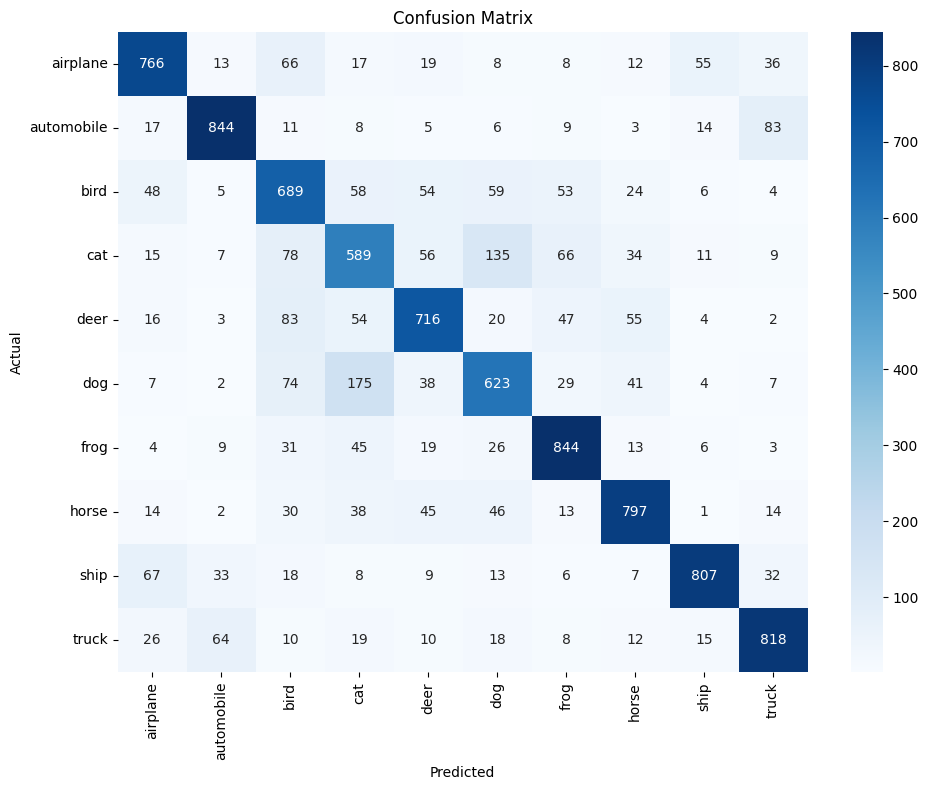


📊 CIFAR-10 Classification Metrics:

airplane      TP=766  FP=214  FN=234  TN= 8786  FPR=0.024  FNR=0.234  PPV=0.782  TPR=0.766  DP=0.098  TE=9.84
automobile    TP=844  FP=138  FN=156  TN= 8862  FPR=0.015  FNR=0.156  PPV=0.859  TPR=0.844  DP=0.098  TE=10.17
bird          TP=689  FP=401  FN=311  TN= 8599  FPR=0.045  FNR=0.311  PPV=0.632  TPR=0.689  DP=0.109  TE=6.98
cat           TP=589  FP=422  FN=411  TN= 8578  FPR=0.047  FNR=0.411  PPV=0.583  TPR=0.589  DP=0.101  TE=8.77
deer          TP=716  FP=255  FN=284  TN= 8745  FPR=0.028  FNR=0.284  PPV=0.737  TPR=0.716  DP=0.097  TE=10.02
dog           TP=623  FP=331  FN=377  TN= 8669  FPR=0.037  FNR=0.377  PPV=0.653  TPR=0.623  DP=0.095  TE=10.25
frog          TP=844  FP=239  FN=156  TN= 8761  FPR=0.027  FNR=0.156  PPV=0.779  TPR=0.844  DP=0.108  TE=5.87
horse         TP=797  FP=201  FN=203  TN= 8799  FPR=0.022  FNR=0.203  PPV=0.799  TPR=0.797  DP=0.100  TE=9.09
ship          TP=807  FP=116  FN=193  TN= 8884  FPR=0.013  FNR=0.193  PPV=0.874 

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Device Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- CIFAR-10 Data Loading ---
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

classes = testset.classes

# --- Define ResNet-18 adapted for CIFAR-10 ---
resnet = torchvision.models.resnet18(pretrained=False)
resnet.fc = nn.Linear(resnet.fc.in_features, 10)
resnet.to(device)

# --- Loss & Optimizer ---
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

# --- Training ---
print("\n🔁 Training ResNet-18 on CIFAR-10...\n")
epochs = 10
for epoch in range(epochs):
    resnet.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(trainloader):.4f}")

print("\n✅ Training Complete.\n")

# --- Evaluation ---
resnet.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --- Fairness Metrics ---
def compute_fairness_metrics(cm, labels):
    metrics = {}
    total_samples = cm.sum()
    label_indices = {lbl: i for i, lbl in enumerate(labels)}

    for lbl in labels:
        i = label_indices[lbl]

        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = total_samples - TP - FP - FN

        pred_pos = cm[:, i].sum()
        dp = pred_pos / total_samples if total_samples else 0

        eo = TP / (TP + FN) if (TP + FN) else 0
        tpr = eo
        fpr = FP / (FP + TN) if (FP + TN) else 0
        ppv = TP / (TP + FP) if (TP + FP) else 0
        TE_ratio = (FN / (FN + TP)) / fpr if fpr else float('inf')

        metrics[lbl] = {
            'Demographic_Parity': dp,
            'Equality_of_Opportunity': eo,
            'Equalized_Odds_TPR': tpr,
            'Equalized_Odds_FPR': fpr,
            'Predictive_Parity': ppv,
            'Treatment_Equality': TE_ratio
        }

    return metrics

# Compute and Print
fairness_metrics = compute_fairness_metrics(cm, classes)

print("\n📊 Fairness Metrics per CIFAR-10 Class:\n")
for lbl, v in fairness_metrics.items():
    print(f"{lbl:<12}  "
          f"DP={v['Demographic_Parity']:.4f}  "
          f"EOpp={v['Equality_of_Opportunity']:.4f}  "
          f"EOdds_TPR={v['Equalized_Odds_TPR']:.4f}  "
          f"EOdds_FPR={v['Equalized_Odds_FPR']:.4f}  "
          f"PPV={v['Predictive_Parity']:.4f}  "
          f"TE={v['Treatment_Equality']:.4f}")


In [ ]:
# --- Fairness Metrics ---
def compute_fairness_metrics(cm, labels):
    metrics = {}
    total_samples = cm.sum()
    label_indices = {lbl: i for i, lbl in enumerate(labels)}

    for lbl in labels:
        i = label_indices[lbl]

        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = total_samples - TP - FP - FN

        pred_pos = cm[:, i].sum()
        dp = pred_pos / total_samples if total_samples else 0

        eo = TP / (TP + FN) if (TP + FN) else 0
        tpr = eo
        fpr = FP / (FP + TN) if (FP + TN) else 0
        ppv = TP / (TP + FP) if (TP + FP) else 0
        TE_ratio = (FN / (FN + TP)) / fpr if fpr else float('inf')

        metrics[lbl] = {
            'Demographic_Parity': dp,
            'Equality_of_Opportunity': eo,
            'Equalized_Odds_TPR': tpr,
            'Equalized_Odds_FPR': fpr,
            'Predictive_Parity': ppv,
            'Treatment_Equality': TE_ratio
        }

    return metrics

# Compute and Print
fairness_metrics = compute_fairness_metrics(cm, classes)

print("\n📊 Fairness Metrics per CIFAR-10 Class:\n")
for lbl, v in fairness_metrics.items():
    print(f"{lbl:<12}  "
          f"DP={v['Demographic_Parity']:.4f}  "
          f"EOpp={v['Equality_of_Opportunity']:.4f}  "
          f"EOdds_TPR={v['Equalized_Odds_TPR']:.4f}  "
          f"EOdds_FPR={v['Equalized_Odds_FPR']:.4f}  "
          f"PPV={v['Predictive_Parity']:.4f}  "
          f"TE={v['Treatment_Equality']:.4f}")



📊 Fairness Metrics per CIFAR-10 Class:

airplane      DP=0.0980  EOpp=0.7660  EOdds_TPR=0.7660  EOdds_FPR=0.0238  PPV=0.7816  TE=9.8411
automobile    DP=0.0982  EOpp=0.8440  EOdds_TPR=0.8440  EOdds_FPR=0.0153  PPV=0.8595  TE=10.1739
bird          DP=0.1090  EOpp=0.6890  EOdds_TPR=0.6890  EOdds_FPR=0.0446  PPV=0.6321  TE=6.9800
cat           DP=0.1011  EOpp=0.5890  EOdds_TPR=0.5890  EOdds_FPR=0.0469  PPV=0.5826  TE=8.7654
deer          DP=0.0971  EOpp=0.7160  EOdds_TPR=0.7160  EOdds_FPR=0.0283  PPV=0.7374  TE=10.0235
dog           DP=0.0954  EOpp=0.6230  EOdds_TPR=0.6230  EOdds_FPR=0.0368  PPV=0.6530  TE=10.2508
frog          DP=0.1083  EOpp=0.8440  EOdds_TPR=0.8440  EOdds_FPR=0.0266  PPV=0.7793  TE=5.8745
horse         DP=0.0998  EOpp=0.7970  EOdds_TPR=0.7970  EOdds_FPR=0.0223  PPV=0.7986  TE=9.0896
ship          DP=0.0923  EOpp=0.8070  EOdds_TPR=0.8070  EOdds_FPR=0.0129  PPV=0.8743  TE=14.9741
truck         DP=0.1008  EOpp=0.8180  EOdds_TPR=0.8180  EOdds_FPR=0.0211  PPV=0.8115  TE=8.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)  # 10 classes for MNIST digits (0-9)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Instantiate model, loss function, and optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(trainloader)}, Accuracy: {correct / total * 100}%")


100%|██████████| 9.91M/9.91M [00:00<00:00, 12.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 346kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.18MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.33MB/s]


Epoch 1/5, Loss: 0.42268282193134527, Accuracy: 86.54166666666666%
Epoch 2/5, Loss: 0.06624882882086139, Accuracy: 97.92333333333333%
Epoch 3/5, Loss: 0.04323331044198993, Accuracy: 98.62833333333333%
Epoch 4/5, Loss: 0.034066872733891126, Accuracy: 98.90166666666667%
Epoch 5/5, Loss: 0.026076360979135575, Accuracy: 99.18%


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have predictions and true labels
def compute_fairness_metrics(y_true, y_pred, labels):
    metrics = {}
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    total_samples = cm.sum()
    label_indices = {lbl: i for i, lbl in enumerate(labels)}

    for lbl in labels:
        i = label_indices[lbl]

        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = total_samples - TP - FP - FN

        pred_pos = cm[:, i].sum()
        dp = pred_pos / total_samples if total_samples else 0

        eo = TP / (TP + FN) if (TP + FN) else 0
        tpr = eo
        fpr = FP / (FP + TN) if (FP + TN) else 0
        ppv = TP / (TP + FP) if (TP + FP) else 0
        TE_ratio = (FN / (FN + TP)) / fpr if fpr else float('inf')

        metrics[lbl] = {
            'Demographic_Parity': dp,
            'Equality_of_Opportunity': eo,
            'Equalized_Odds_TPR': tpr,
            'Equalized_Odds_FPR': fpr,
            'Predictive_Parity': ppv,
            'Treatment_Equality': TE_ratio
        }

    return metrics

# Example: Compute fairness for the model
model.eval()  # Set model to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Assuming labels are from 0 to 9 (since it's MNIST)
labels = np.arange(10)
fairness_metrics = compute_fairness_metrics(y_true, y_pred, labels)

# Print the fairness metrics
print("\n📊 Fairness Metrics per Class (0-9 digits):\n")
for lbl, v in fairness_metrics.items():
    print(f"Digit {lbl:<2}  "
          f"DP={v['Demographic_Parity']:.4f}  "
          f"EOpp={v['Equality_of_Opportunity']:.4f}  "
          f"EOdds_TPR={v['Equalized_Odds_TPR']:.4f}  "
          f"EOdds_FPR={v['Equalized_Odds_FPR']:.4f}  "
          f"PPV={v['Predictive_Parity']:.4f}  "
          f"TE={v['Treatment_Equality']:.4f}")



📊 Fairness Metrics per Class (0-9 digits):

Digit 0   DP=0.0983  EOpp=0.9949  EOdds_TPR=0.9949  EOdds_FPR=0.0009  PPV=0.9919  TE=5.7526
Digit 1   DP=0.1135  EOpp=0.9956  EOdds_TPR=0.9956  EOdds_FPR=0.0006  PPV=0.9956  TE=7.8106
Digit 2   DP=0.1030  EOpp=0.9893  EOdds_TPR=0.9893  EOdds_FPR=0.0010  PPV=0.9913  TE=10.6210
Digit 3   DP=0.1000  EOpp=0.9851  EOdds_TPR=0.9851  EOdds_FPR=0.0006  PPV=0.9950  TE=26.7030
Digit 4   DP=0.0978  EOpp=0.9919  EOdds_TPR=0.9919  EOdds_FPR=0.0004  PPV=0.9959  TE=18.3666
Digit 5   DP=0.0919  EOpp=0.9966  EOdds_TPR=0.9966  EOdds_FPR=0.0033  PPV=0.9674  TE=1.0211
Digit 6   DP=0.0951  EOpp=0.9854  EOdds_TPR=0.9854  EOdds_FPR=0.0008  PPV=0.9926  TE=18.8768
Digit 7   DP=0.1029  EOpp=0.9883  EOdds_TPR=0.9883  EOdds_FPR=0.0014  PPV=0.9874  TE=8.0563
Digit 8   DP=0.0974  EOpp=0.9887  EOdds_TPR=0.9887  EOdds_FPR=0.0012  PPV=0.9887  TE=9.2669
Digit 9   DP=0.1001  EOpp=0.9841  EOdds_TPR=0.9841  EOdds_FPR=0.0009  PPV=0.9920  TE=17.8216


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define LeNet-5 model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)  # 10 classes for Fashion MNIST

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Instantiate model, loss function, and optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(trainloader)}, Accuracy: {correct / total * 100}%")


100%|██████████| 26.4M/26.4M [00:00<00:00, 111MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 5.92MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 55.8MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 25.3MB/s]


Epoch 1/5, Loss: 0.7130852135609208, Accuracy: 74.15666666666667%
Epoch 2/5, Loss: 0.3640822431267197, Accuracy: 86.72166666666666%
Epoch 3/5, Loss: 0.3112299836901968, Accuracy: 88.47500000000001%
Epoch 4/5, Loss: 0.2831254987034208, Accuracy: 89.52%
Epoch 5/5, Loss: 0.26371570330248206, Accuracy: 90.22833333333334%


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have predictions and true labels
def compute_fairness_metrics(y_true, y_pred, labels):
    metrics = {}
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    total_samples = cm.sum()
    label_indices = {lbl: i for i, lbl in enumerate(labels)}

    for lbl in labels:
        i = label_indices[lbl]

        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = total_samples - TP - FP - FN

        pred_pos = cm[:, i].sum()
        dp = pred_pos / total_samples if total_samples else 0

        eo = TP / (TP + FN) if (TP + FN) else 0
        tpr = eo
        fpr = FP / (FP + TN) if (FP + TN) else 0
        ppv = TP / (TP + FP) if (TP + FP) else 0
        TE_ratio = (FN / (FN + TP)) / fpr if fpr else float('inf')

        metrics[lbl] = {
            'Demographic_Parity': dp,
            'Equality_of_Opportunity': eo,
            'Equalized_Odds_TPR': tpr,
            'Equalized_Odds_FPR': fpr,
            'Predictive_Parity': ppv,
            'Treatment_Equality': TE_ratio
        }

    return metrics

# Example: Compute fairness for the model
model.eval()  # Set model to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Assuming labels are from 0 to 9 (since it's Fashion MNIST)
labels = np.arange(10)
fairness_metrics = compute_fairness_metrics(y_true, y_pred, labels)

# Print the fairness metrics
print("\n📊 Fairness Metrics per Class (0-9 digits):\n")
for lbl, v in fairness_metrics.items():
    print(f"Class {lbl:<2}  "
          f"DP={v['Demographic_Parity']:.4f}  "
          f"EOpp={v['Equality_of_Opportunity']:.4f}  "
          f"EOdds_TPR={v['Equalized_Odds_TPR']:.4f}  "
          f"EOdds_FPR={v['Equalized_Odds_FPR']:.4f}  "
          f"PPV={v['Predictive_Parity']:.4f}  "
          f"TE={v['Treatment_Equality']:.4f}")



📊 Fairness Metrics per Class (0-9 digits):

Class 0   DP=0.0929  EOpp=0.8020  EOdds_TPR=0.8020  EOdds_FPR=0.0141  PPV=0.8633  TE=14.0315
Class 1   DP=0.0972  EOpp=0.9660  EOdds_TPR=0.9660  EOdds_FPR=0.0007  PPV=0.9938  TE=51.0000
Class 2   DP=0.1128  EOpp=0.8810  EOdds_TPR=0.8810  EOdds_FPR=0.0274  PPV=0.7810  TE=4.3360
Class 3   DP=0.1069  EOpp=0.9280  EOdds_TPR=0.9280  EOdds_FPR=0.0157  PPV=0.8681  TE=4.5957
Class 4   DP=0.0927  EOpp=0.7900  EOdds_TPR=0.7900  EOdds_FPR=0.0152  PPV=0.8522  TE=13.7956
Class 5   DP=0.0990  EOpp=0.9680  EOdds_TPR=0.9680  EOdds_FPR=0.0024  PPV=0.9778  TE=13.0909
Class 6   DP=0.0989  EOpp=0.7060  EOdds_TPR=0.7060  EOdds_FPR=0.0314  PPV=0.7139  TE=9.3498
Class 7   DP=0.1064  EOpp=0.9770  EOdds_TPR=0.9770  EOdds_FPR=0.0097  PPV=0.9182  TE=2.3793
Class 8   DP=0.0970  EOpp=0.9560  EOdds_TPR=0.9560  EOdds_FPR=0.0016  PPV=0.9856  TE=28.2857
Class 9   DP=0.0962  EOpp=0.9390  EOdds_TPR=0.9390  EOdds_FPR=0.0026  PPV=0.9761  TE=23.8696
